## Types of Missing Values
There are mainly three types of missing values- MCAR, MNAR and MAR.

**1. MCAR (Missing Completly At Random)**: 
- A variable is missing completely at random if the probability of being missing is the same for all the observations.
- When data is MCAR, which Means there is absolutely no relationship between the data missing and any other observed or missing value in the dataset. 
- In other words, those missing data points are a random subset of the dataset.

**2. MNAR (Missing Data Not At Random)**:
- As the name suggests their will be some relationship between the data missing and any other value in the dataset.

**3. MAR(Missing At Random)**:
- Missing at Random means, the propensity for a data point to be missing is not related to the missing data, but it is related to some of the observed data

### **Explanation for Missing Values**

There can be many reasons for missing values inside datasets. For example, in a dataset of height and age, there will be more missing values in the age column because girls are not comfortable talking about their age. Similarly, if we prepare a dataset for predicting an employee's salary that includes columns like experience and salary, the salary column will have more missing values because most people do not want to share information about their salary. In a bigger scenario where we are preparing data for a large population, some diseases, people who died in an accident, the number of taxpayers inside a city, etc. People participating in all these and similar scenarios usually hesitate to put down their personal information and sometimes hide the real numbers. Even if you download the data from a third-party resource, there is still some chance of missing values due to some corruption in the file while downloading.

### **Why Handle Missing Values ?**
* Many machine learning algorithms faild to perform on the dataset if it contains missing values. However there are some algorithms that works even with missing values like K-nearest neighbours and Naive Bayes.

* You may end up building a biased model that will lead to incorrect results.
* Missing values reduces accuracy of the model.
* Missing values can lead to less precision.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
## Sample Datasets & Libraries
import pandas as pd
titanic = pd.read_csv ('drive/MyDrive/Titanic-Dataset.csv')

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

before imputing missing values let's see how to find missing values inside dataset.

## **Checking For Missing Values Inside The Dataset**

In [3]:
## 1. Using isna() or isnull() To Find Count
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
## 2. Missing Values Percentage
round((titanic.isna().sum() / len(titanic))*100,2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

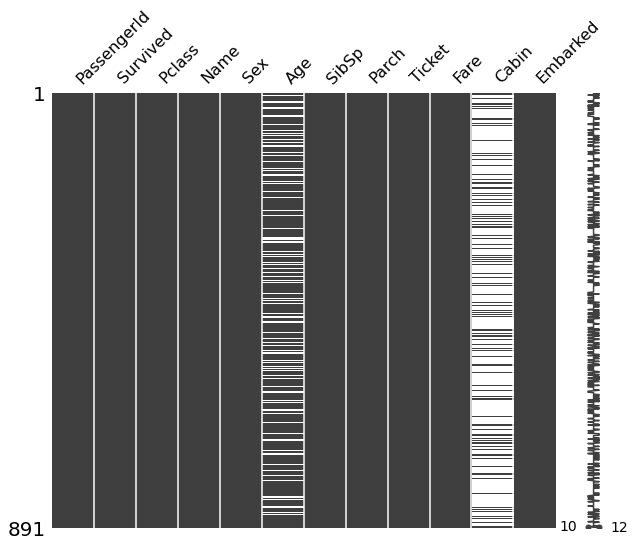

In [5]:
## 3. Visulizing Missing Values
import missingno as mn
mn.matrix(titanic,figsize=(10,8));

# How To Handle Missing Values?

There are two ways to handle missing values-
1. Dropping Missing Values
2. Imputing Missing Values With Some Other Value (Preferred)

### 1. Dropping Missing Values
* if missing values is of type Missing At Random(MAR) or Missing Completly At Random(MCAR) then it can be deleted. 
* One of the biggest disadvantage of dropping missing values is one might end up deleting some useful data as well with missing values. 

There are two ways to remove missing values
1. Deleting the entire row containing missing values
2. Deleting the entire column containing missing values

#### 1. Deleting The Entire Row

In [6]:
## Copy of data
df = titanic.copy()
df = df.dropna(axis=0)
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [7]:
print('Dataset Size With Missing Values',titanic.shape)

Dataset Size With Missing Values (891, 12)


In [8]:
print('Dataset Size Without Missing Values',df.shape)

Dataset Size Without Missing Values (183, 12)


There is a big loss of data, because Cabin column contains more than 75% missing values.

#### 2. Deleting The Entire Column

In [9]:
## Copy of data
df = titanic.copy()
df = df.drop(['Cabin','Age','Embarked'],axis=1) 
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

Although We Have Removed Missing Values, But With Them a big part of data is also lost. Like Age is a very important column for survival of a person. 

> Deleting Missing Values From The Dataset Is Only An Option if we have less than 10% of missing values on a big dataset. 

The Best and Evergreen option is to Impute missing values with some other similar value.

## 2. Imputing Missing Values

## METHOD 1 → Mean Value Imputation 

In this technique we replace missing values with the `mean` value of the column containing missing values

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


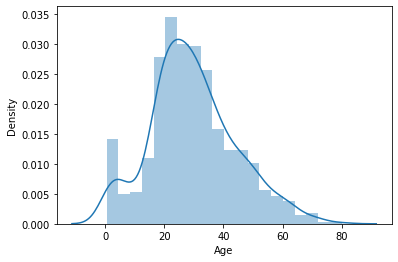

In [10]:
## First Step : Check The Distribution
sns.distplot(titanic.Age);

In [11]:
def impute_nan_mean(df,column,mean):
    df[column+'_mean'] = df[column].fillna(mean)
    return df

mean_val = titanic.Age.mean()
titanic = impute_nan_mean(titanic,'Age',mean_val)

In [12]:
titanic[titanic.Age.isna()][['Age','Age_mean']]

,Age,Age_mean
5,NaN,29.699118
17,NaN,29.699118
19,NaN,29.699118
26,NaN,29.699118
28,NaN,29.699118
...,...,...
859,NaN,29.699118
863,NaN,29.699118
868,NaN,29.699118
878,NaN,29.699118


Mean Imputation is a great choice, if distribution is normal or close to normal. 

In case of skewed distribution we shoud go with meadian value.

## METHOD 2: Median Value Imputation

In this technique we replace all the missing value with median value of the column

In [13]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.000000
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.000000
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.000000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.000000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,27.000000
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,19.000000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,29.699118
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,26.000000


In [14]:
## Imputing missing value with median value of the column
def impute_nan_median(df,column,median):
    df[column+'_median'] = df[column].fillna(median)
    return df

median_val = titanic.Age.median()
titanic = impute_nan_median(titanic,'Age',median_val)

In [15]:
titanic[titanic.Age.isna()][['Age','Age_median']]

,Age,Age_median
5,NaN,28.0
17,NaN,28.0
19,NaN,28.0
26,NaN,28.0
28,NaN,28.0
...,...,...
859,NaN,28.0
863,NaN,28.0
868,NaN,28.0
878,NaN,28.0


## METHOD 3: Mode Imputation (Frequent Category Imputation)

Mode value imputation is mostly used for categorical data. it can also be used for numerical variables as well.

* In this technique we replace all the missing values with the most frequent value of the column.

In [16]:
## Imputing missing value with median value of the column
def impute_nan_mode(df,column,mode):
    df[column+'_mode'] = df[column].fillna(mode)
    return df

mode_val = titanic.Age.mode()
titanic = impute_nan_mode(titanic,'Age',mode_val)

In [17]:
titanic[titanic.Age.isna()][['Age','Age_mode']]

,Age,Age_mode
5,NaN,NaN
17,NaN,NaN
19,NaN,NaN
26,NaN,NaN
28,NaN,NaN
...,...,...
859,NaN,NaN
863,NaN,NaN
868,NaN,NaN
878,NaN,NaN


you see how most NAN values gets replaced with NAN values because the most frequent value of this numerical column is `NAN`. To use mode here we need to ignore all the NAN values and then apply mode on remaining values. 

In [18]:
titanic[titanic.Age.notna()]['Age'].mode()[0]

24.0

In [19]:
## Imputing missing value with median value of the column
def impute_nan_mode(df,column,mode):
    df[column+'_mode'] = df[column].fillna(mode)
    return df

mode_val = titanic[titanic.Age.notna()]['Age'].mode()[0]    ## find mode of all the non missing values of Age column
titanic = impute_nan_mode(titanic,'Age',mode_val)

In [20]:
titanic[titanic.Age.isna()][['Age','Age_mode']]

,Age,Age_mode
5,NaN,24.0
17,NaN,24.0
19,NaN,24.0
26,NaN,24.0
28,NaN,24.0
...,...,...
859,NaN,24.0
863,NaN,24.0
868,NaN,24.0
878,NaN,24.0


Although the above code worked but you should never use mode for a numerical column until there is some exception.

Mode works better for categorical data with less categories.

* One of the biggest advantage of using mode as categorical data imputer is that we don't need to convert categories into numerical data.

Let's use it to fill missing values in Embarked Column.

In [21]:
titanic.Embarked.isna().sum()

2

In [22]:
#### STEP 1: Find Mode Values
mode_cat_embarked = titanic.Embarked.mode()[0]

#### STEP 2: Fill Missing Values With Most Frequent Category
titanic['Embarked_mode'] = titanic['Embarked'].fillna(mode_cat_embarked)

#### Check For Results
titanic['Embarked_mode'].isna().sum()

0

In [23]:
mode_cat_embarked

'S'

## METHOD 4:  Random Sample Imputation

In this method we will replace all the missing values with  a random sample from the data.

In [24]:
### STEP 1: Generating Random Sample
sample = titanic.Age.sample().values[0]

### STEP 2: Filling nan values with random sample value
titanic['Age'+'_random_sample'] = titanic['Age'].fillna(sample)

titanic[titanic['Age'].isna()][['Age','Age_random_sample']]

,Age,Age_random_sample
5,NaN,8.0
17,NaN,8.0
19,NaN,8.0
26,NaN,8.0
28,NaN,8.0
...,...,...
859,NaN,8.0
863,NaN,8.0
868,NaN,8.0
878,NaN,8.0


In [25]:
### STEP 1: Generating Random Sample
sample = titanic.Age.sample().values[0]

### STEP 2: Filling nan values with random sample value
titanic['Age'+'_random_sample'] = titanic['Age'].fillna(sample)

titanic[titanic['Age'].isna()][['Age','Age_random_sample']]

,Age,Age_random_sample
5,NaN,19.0
17,NaN,19.0
19,NaN,19.0
26,NaN,19.0
28,NaN,19.0
...,...,...
859,NaN,19.0
863,NaN,19.0
868,NaN,19.0
878,NaN,19.0


You see everytime we run the codeblock we get a new random sample value.

To avoid this we can make use of `np.seed()`

* Note: There are chances that our random sample will pick nan as a sample, to avoid this we can use the same method we have used in mode.

In [26]:
import numpy as np
np.random.seed(42)

### STEP 1: Generating Random Sample
sample = titanic[titanic.Age.notna()]['Age'].sample().values[0]

### STEP 2: Filling nan values with random sample value
titanic['Age'+'_random_sample'] = titanic['Age'].fillna(sample)

titanic[titanic['Age'].isna()][['Age','Age_random_sample']]

,Age,Age_random_sample
5,NaN,42.0
17,NaN,42.0
19,NaN,42.0
26,NaN,42.0
28,NaN,42.0
...,...,...
859,NaN,42.0
863,NaN,42.0
868,NaN,42.0
878,NaN,42.0


no matter how many time we run the above codeblock the value will remain same, until whole execution resets.

## METHOD 5: End of Distribution

If Missing Value is not at random then we can use this method.  In this we replace all the missing values with 3rd std deviation value

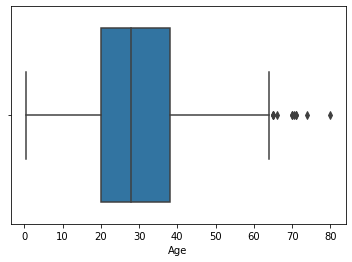

In [27]:
sns.boxplot(x = 'Age',data=titanic);

In [28]:
### STEP 1: Find Extreme Value
extreme = titanic.Age.mean() + 3*titanic.Age.std()

### STEP 2: Fill nan with extreme value
titanic['Age_end_distribution']  = titanic['Age'].fillna(extreme)

titanic
titanic[titanic['Age'].isna()][['Age','Age_end_distribution']]

,Age,Age_end_distribution
5,NaN,73.27861
17,NaN,73.27861
19,NaN,73.27861
26,NaN,73.27861
28,NaN,73.27861
...,...,...
859,NaN,73.27861
863,NaN,73.27861
868,NaN,73.27861
878,NaN,73.27861


we can also use a least value based on our data distribution.

#### In all above methods we are replacing missing values with some other value from the sample. 
What if missing values are not at random?

What if you are required to showcase the importance of missing values?

In all above and similar cases we can use Arbitrary Value Imputation.

## METHOD 6.1: Arbitrary Value Imputation (Numerical)

In this method we replace missing value with lowest or highest value of the distribution. (-infinity, +infinity) 

In case of Age we can replace missing values either with 0 or 100.(least and highest) 

* This method not only fill missing values but also captures the importance of it.

In [29]:
### Filling Values using 0
titanic['Age_0'] = titanic['Age'].fillna(0)

In [30]:
### Filling Values using 100
titanic['Age_100'] = titanic['Age'].fillna(100)

In [31]:
titanic[titanic.Age.isna()][['Age','Age_0','Age_100']]

,Age,Age_0,Age_100
5,NaN,0.0,100.0
17,NaN,0.0,100.0
19,NaN,0.0,100.0
26,NaN,0.0,100.0
28,NaN,0.0,100.0
...,...,...,...
859,NaN,0.0,100.0
863,NaN,0.0,100.0
868,NaN,0.0,100.0
878,NaN,0.0,100.0


## METHOD 6.2: Arbitrary Value Imputation (Categorical)

In [32]:
titanic['Cabin_Missing'] = titanic['Cabin'].fillna('Missing')

In [33]:
titanic[titanic.Cabin.isna()][['Cabin','Cabin_Missing']]

,Cabin,Cabin_Missing
0,NaN,Missing
2,NaN,Missing
4,NaN,Missing
5,NaN,Missing
7,NaN,Missing
...,...,...
884,NaN,Missing
885,NaN,Missing
886,NaN,Missing
888,NaN,Missing


This method works fine but the only problem with this it it creates a new category `Missing`. If count of missing values is higher than other known categories than `Missing`category will impact the result more that will leads to an bad performing model. 

To prevent this problem we can create a new feature containing information about missing values, where 1 will represent a missing value.

## METHOD 7: Capturing Missing Values with new feature.

It works well if the data are not missing completely at random.

In [34]:
import numpy as np
titanic['Age_nan']=np.where(titanic['Age'].isnull(),1,0)

In [35]:
### STEP 1: Creating a new feature
titanic['Cabin_nan']=np.where(titanic['Cabin'].isnull(),1,0)

In [36]:
titanic.iloc[:5][['Cabin','Cabin_nan']]

,Cabin,Cabin_nan
0,NaN,1
1,C85,0
2,NaN,1
3,C123,0
4,NaN,1


Once a new feature is added we can make use of any method to fill missing values. 

In [37]:
titanic['Cabin'].mode()[0]

'B96 B98'

In [38]:
titanic['Cabin'].fillna(titanic['Cabin'].mode()[0])

0      B96 B98
1          C85
2      B96 B98
3         C123
4      B96 B98
        ...   
886    B96 B98
887        B42
888    B96 B98
889       C148
890    B96 B98
Name: Cabin, Length: 891, dtype: object

We can try same for numerical column `Age` as well.

In [39]:
titanic['Age_nan']=np.where(titanic['Age'].isnull(),1,0)

In [40]:
titanic[['Age','Age_nan']]

,Age,Age_nan
0,22.0,0
1,38.0,0
2,26.0,0
3,35.0,0
4,35.0,0
...,...,...
886,27.0,0
887,19.0,0
888,NaN,1
889,26.0,0


All above methods we have discussed makes use of manual approach to find missing values and then fill using fillna. There are some advanced methods as well that makes use of machine learning models to predict missing values. 

Let's see some of the most famous technique of predicting missing values using machine learning.

## METHOD 8: KNN Imputer

In this technique, we predict missing values using an algorithm that uses the values of nearby data points to impute, or predict, missing values. KNN stands for K-Nearest Neighbors, with K referring to the (user-defined) number of neighbors the algorithm will take into account.

KNN only works with numerical data. In some cases, however, non-numerical (e.g., categorical) data may be converted to numerical data for use with the KNN Imputer as well. We can also use the KNN Imputer with multiple features (or columns) at once.

In [41]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Age_median,Age_mode,Embarked_mode,Age_random_sample,Age_end_distribution,Age_0,Age_100,Cabin_Missing,Age_nan,Cabin_nan
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,22.0,22.0,S,22.0,22.00000,22.0,22.0,Missing,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,38.0,38.0,C,38.0,38.00000,38.0,38.0,C85,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,26.0,26.0,S,26.0,26.00000,26.0,26.0,Missing,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,35.0,35.0,S,35.0,35.00000,35.0,35.0,C123,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,35.0,35.0,S,35.0,35.00000,35.0,35.0,Missing,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,...,27.0,27.0,S,27.0,27.00000,27.0,27.0,Missing,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,...,19.0,19.0,S,19.0,19.00000,19.0,19.0,B42,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,...,28.0,24.0,S,42.0,73.27861,0.0,100.0,Missing,1,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,...,26.0,26.0,C,26.0,26.00000,26.0,26.0,C148,0,0


In [42]:
df = titanic[["Survived", "Pclass", "Sex", "SibSp", "Parch", "Fare", "Age"]]
df["Sex"] = [1 if x=="male" else 0 for x in df["Sex"]]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [43]:
### Defining Cols
cols = ['Age','Survived']

### Defining KNN imputer with neighbors
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors=5)

knn.fit_transform(df[cols])

array([[22. ,  0. ],
       [38. ,  1. ],
       [26. ,  1. ],
       ...,
       [30.1,  0. ],
       [26. ,  1. ],
       [32. ,  0. ]])

In [44]:
df2 = pd.DataFrame(knn.transform(df[cols]),columns=['Age', 'Survived'])

In [45]:
df2

,Age,Survived
0,22.0,0.0
1,38.0,1.0
2,26.0,1.0
3,35.0,1.0
4,35.0,0.0
...,...,...
886,27.0,0.0
887,19.0,1.0
888,30.1,0.0
889,26.0,1.0


In [46]:
titanic['Age_KNN'] = df2['Age']

In [47]:
titanic[titanic.Age.isna()][['Age','Age_KNN']]

,Age,Age_KNN
5,NaN,30.1
17,NaN,27.0
19,NaN,27.0
26,NaN,30.1
28,NaN,27.0
...,...,...
859,NaN,30.1
863,NaN,30.1
868,NaN,30.1
878,NaN,30.1


## METHOD 9: Predicting NAN values using Linear Regression

In [48]:
titanic.Age.head(8)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
Name: Age, dtype: float64

In [49]:


train_data = df[df['Age'].notna()]
test_data = df[df["Age"].isnull()]

X_train= train_data.drop('Age',axis=1)
y_train = train_data['Age']

X_test = test_data.drop('Age',axis=1)
y_test = test_data['Age']

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred

array([29.07080066, 30.10833306, 22.44685065, 29.08927347, 22.43705181,
       29.07922599, 32.43692984, 22.43898701, 22.15615704, 29.07922599,
       29.07691632, 24.96460346, 22.43898701, 20.8713251 , 37.80993305,
       44.85950626, 17.21443083, 29.07922599, 29.07691632, 22.43842532,
       29.07691632, 29.07691632, 29.07922599, 22.14798185, 18.1926178 ,
       29.07691632, 29.08140983, 17.39852793, 27.61791252, 29.08796287,
       29.06774208, -5.49189866, 36.98755908, 44.88640441, 15.9929439 ,
       -5.20126796, 37.01068094, 44.52580031, 18.32218064, 29.08140983,
       22.43898701, -5.49189866, 25.08068578, 29.07922599, 16.2835746 ,
       29.37503621, 25.27089854, 18.32218064, 29.08889901, 37.44600929,
       29.08140983, 29.37204054, 44.81038921, 22.43898701, 37.23610531,
       44.88528103, 44.85950626, 37.88482487, 22.43898701, 13.91474356,
       30.40869971, 29.07691632, 36.97144531, -5.49189866, 14.20537427,
       32.62971335, 29.07922599, 18.31319362, 44.75047576, 29.08

In [50]:
a = y_train.to_list()
b = list(y_pred)
a.extend(b)

In [51]:
titanic['Age_LR'] = a

In [52]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked_mode,Age_random_sample,Age_end_distribution,Age_0,Age_100,Cabin_Missing,Age_nan,Cabin_nan,Age_KNN,Age_LR
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,22.0,22.00000,22.0,22.0,Missing,0,1,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,38.0,38.00000,38.0,38.0,C85,0,0,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,26.0,26.00000,26.0,26.0,Missing,0,1,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,35.0,35.00000,35.0,35.0,C123,0,0,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,35.0,35.00000,35.0,35.0,Missing,0,1,35.0,35.0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,...,Q,42.0,73.27861,0.0,100.0,Missing,1,1,30.1,54.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,...,S,54.0,54.00000,54.0,54.0,E46,0,0,54.0,2.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,...,S,2.0,2.00000,2.0,2.0,Missing,0,1,2.0,27.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,...,S,27.0,27.00000,27.0,27.0,Missing,0,1,27.0,14.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,...,C,14.0,14.00000,14.0,14.0,Missing,0,1,14.0,4.0


In [53]:
titanic[titanic.Age.isna()][['Age','Age_LR']]

,Age,Age_LR
5,NaN,54.000000
17,NaN,35.000000
19,NaN,15.000000
26,NaN,28.000000
28,NaN,21.000000
...,...,...
859,NaN,17.214431
863,NaN,37.236105
868,NaN,44.681575
878,NaN,29.093393


## Method 10: Imputation Using Multivariate Imputation by Chained Equation (MICE)

In [54]:
!pip install impyute

In [55]:
from impyute.imputation.cs import mice

# start the MICE training
data_imputed=mice(df.values)

In [56]:
cleaned_df = pd.DataFrame(data_imputed,columns=['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Age'])

In [57]:
titanic['Age_MICE'] = cleaned_df['Age']

In [58]:
titanic[titanic.Age.isna()][['Age','Age_MICE']]

,Age,Age_MICE
5,NaN,29.070801
17,NaN,30.108333
19,NaN,22.446851
26,NaN,29.089273
28,NaN,22.437052
...,...,...
859,NaN,29.089211
863,NaN,-5.201268
868,NaN,29.055198
878,NaN,29.079226


### Let's Compare Each Method Imputations...........

In [59]:
titanic[titanic.Age.isna()][['Age','Age_mean','Age_median', 'Age_mode', 'Age_random_sample','Age_end_distribution', 'Age_0', 'Age_100','Age_KNN','Age_LR','Age_MICE']]

,Age,Age_mean,Age_median,Age_mode,Age_random_sample,Age_end_distribution,Age_0,Age_100,Age_KNN,Age_LR,Age_MICE
5,NaN,29.699118,28.0,24.0,42.0,73.27861,0.0,100.0,30.1,54.000000,29.070801
17,NaN,29.699118,28.0,24.0,42.0,73.27861,0.0,100.0,27.0,35.000000,30.108333
19,NaN,29.699118,28.0,24.0,42.0,73.27861,0.0,100.0,27.0,15.000000,22.446851
26,NaN,29.699118,28.0,24.0,42.0,73.27861,0.0,100.0,30.1,28.000000,29.089273
28,NaN,29.699118,28.0,24.0,42.0,73.27861,0.0,100.0,27.0,21.000000,22.437052
...,...,...,...,...,...,...,...,...,...,...,...
859,NaN,29.699118,28.0,24.0,42.0,73.27861,0.0,100.0,30.1,17.214431,29.089211
863,NaN,29.699118,28.0,24.0,42.0,73.27861,0.0,100.0,30.1,37.236105,-5.201268
868,NaN,29.699118,28.0,24.0,42.0,73.27861,0.0,100.0,30.1,44.681575,29.055198
878,NaN,29.699118,28.0,24.0,42.0,73.27861,0.0,100.0,30.1,29.093393,29.079226


## Thanks For Reading
I hope You Found Someting useful.

### Don't Forgot to give the notebook a 🔼

### **----Check Out My Other Notebooks As Well---**

[Best Numpy Functions For Data Science](https://www.kaggle.com/code/abhayparashar31/best-numpy-functions-for-data-science)<br>
[Spaceship Titanic Complete Analysis + Prediction Using Plotly & XGBClassifier](https://www.kaggle.com/code/abhayparashar31/spaceship-titanic-complete-analysis-prediction)